In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load Data
train_data = pd.read_csv("./data/train.csv", index_col=0)
test_data = pd.read_csv("./data/test.csv", index_col=0)
validation_data = pd.read_csv("./data/validation.csv", index_col=0)

In [3]:
train_data.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   object 
 1

In [5]:
train_data.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.451124,20.740828,22.766963,58.281183,4409.751243,0.233136,0.346982,0.790296,36.207274,-119.768187,...,32.681893,2306.078107,6.965680,754.719141,1.953846,3065.809082,0.200000,0.677870,93491.892781,0.265325
std,16.731518,20.366105,15.429992,21.197931,1170.599119,0.422878,0.476066,0.407146,2.471090,2.154078,...,24.621041,2271.448881,25.250169,854.909725,7.814374,2884.817379,0.400047,0.467348,1863.337187,0.441559
min,19.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,...,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,4.000000,9.050000,40.000000,3493.000000,0.000000,0.000000,1.000000,33.994524,-121.788090,...,9.000000,401.500000,0.000000,67.680000,0.000000,592.750000,0.000000,0.000000,92102.000000,0.000000
50%,46.000000,17.000000,22.570000,61.000000,4531.000000,0.000000,0.000000,1.000000,36.205465,-119.622676,...,30.000000,1424.600000,0.000000,396.640000,0.000000,2151.470000,0.000000,1.000000,93513.000000,0.000000
75%,60.000000,27.000000,36.170000,75.000000,5381.000000,0.000000,1.000000,1.000000,38.196497,-117.991372,...,56.000000,3846.750000,0.000000,1200.000000,0.000000,4845.750000,0.000000,1.000000,95337.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,6500.000000,1.000000,1.000000,1.000000,41.962127,-114.192901,...,72.000000,8672.450000,150.000000,3564.000000,49.790000,11979.340000,1.000000,1.000000,96150.000000,1.000000


In [6]:
train_data.shape

(4225, 52)

In [7]:
train_data.nunique()

Age                                    62
Avg Monthly GB Download                50
Avg Monthly Long Distance Charges    2666
Churn Category                          5
Churn Reason                           20
Churn Score                            81
City                                 1085
CLTV                                 2671
Contract                                3
Country                                 1
Customer ID                          4225
Customer Status                         3
Dependents                              2
Device Protection Plan                  2
Gender                                  2
Internet Service                        2
Internet Type                           3
Lat Long                             1627
Latitude                             1594
Longitude                            1593
Married                                 2
Monthly Charge                       1387
Multiple Lines                          2
Number of Dependents              

In [8]:
# Drop the unwanted columns
columns_to_drop = ['Customer ID', 'Quarter', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Population', 'Senior Citizen', 'Under 30']
train_data_dropped = train_data.drop(columns=columns_to_drop, axis=1)
train_data_dropped.info()
print(train_data_dropped.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Customer Status                    4225 non-null   object 
 10  Dependents                         4225 non-null   int64  
 11  Device Protection Plan             4225 non-null   int64  
 1

In [9]:
train_data_dropped.value_counts()

Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  Churn Category   Churn Reason                              Churn Score  City             CLTV  Contract        Customer Status  Dependents  Device Protection Plan  Gender  Internet Service  Internet Type  Married  Monthly Charge  Multiple Lines  Number of Dependents  Number of Referrals  Offer    Online Backup  Online Security  Paperless Billing  Partner  Payment Method   Phone Service  Premium Tech Support  Referred a Friend  Satisfaction Score  Streaming Movies  Streaming Music  Streaming TV  Tenure in Months  Total Charges  Total Extra Data Charges  Total Long Distance Charges  Total Refunds  Total Revenue  Unlimited Data  Churn
19   51                       44.46                              Price            Extra data charges                        88           Los Angeles      4903  Month-to-Month  Churned          0           0                       Female  1                 DSL            1        44.30           

In [10]:
train_data_dropped["Stickiness Score"] = train_data_dropped["Device Protection Plan"] + train_data_dropped["Premium Tech Support"] + train_data_dropped["Streaming TV"] + train_data_dropped["Streaming Movies"] + train_data_dropped["Streaming Music"]+ train_data_dropped["Online Security"] + train_data_dropped["Online Backup"]

In [11]:
train_data_dropped.drop(["Device Protection Plan", 'Premium Tech Support', 'Streaming TV', 'Streaming Music', 'Streaming Movies', 'Online Backup', 'Online Security'], axis=1, inplace=True)

In [12]:
train_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Customer Status                    4225 non-null   object 
 10  Dependents                         4225 non-null   int64  
 11  Gender                             4225 non-null   object 
 1

In [13]:
train_data_dropped["Stickiness Score"]

0       4
1       3
2       0
3       4
4       3
       ..
4220    0
4221    2
4222    0
4223    6
4224    6
Name: Stickiness Score, Length: 4225, dtype: int64

In [14]:
train_data_churn_category = train_data_dropped.copy(deep=True)

In [15]:
train_data_churn_category["Churn Category"] = train_data_churn_category["Churn Category"].fillna("No Category")

In [16]:
train_data_churn_category["Churn Category"].value_counts()

Churn Category
No Category        3104
Competitor          486
Attitude            200
Dissatisfaction     171
Other               134
Price               130
Name: count, dtype: int64

In [17]:
# Handle Churn Category
# We need to convert the object type to int type
# We will use Label Encoding for this purpose

churn_category_encoder = LabelEncoder()
train_data_churn_category['Churn Category'] = churn_category_encoder.fit_transform(train_data_churn_category['Churn Category'])
print(churn_category_encoder.classes_)
train_data_churn_category['Churn Category'].head()

['Attitude' 'Competitor' 'Dissatisfaction' 'No Category' 'Other' 'Price']


0    3
1    3
2    3
3    3
4    2
Name: Churn Category, dtype: int64

In [18]:
train_data_churn_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   int64  
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Customer Status                    4225 non-null   object 
 10  Dependents                         4225 non-null   int64  
 11  Gender                             4225 non-null   object 
 1

In [19]:
# Let's work on  Churn Reason column
train_data_churn_reason = train_data_churn_category.copy(deep=True)

In [20]:
train_data_churn_reason["Churn Reason"].value_counts()

Churn Reason
Competitor had better devices                188
Competitor made better offer                 187
Attitude of support person                   136
Don't know                                    87
Attitude of service provider                  64
Competitor offered more data                  57
Competitor offered higher download speeds     54
Network reliability                           46
Price too high                                44
Product dissatisfaction                       42
Long distance charges                         39
Moved                                         32
Service dissatisfaction                       32
Extra data charges                            27
Limited range of services                     25
Lack of affordable download/upload speed      20
Lack of self-service on Website               17
Poor expertise of online support              14
Deceased                                       6
Poor expertise of phone support                4
Name: c

In [21]:
train_data_churn_reason.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Customer Status,...,Satisfaction Score,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Unlimited Data,Churn,Stickiness Score
0,72,4,19.44,3,NaN,51,San Mateo,4849,Two Year,Stayed,...,3,25,2191.15,0,486.00,0.0,2677.15,1,0,4
1,27,59,45.62,3,NaN,27,Sutter Creek,3715,Month-to-Month,Stayed,...,3,35,3418.20,0,1596.70,0.0,5014.90,1,0,3
2,59,0,16.07,3,NaN,59,Santa Cruz,5092,Month-to-Month,Stayed,...,5,46,851.20,0,739.22,0.0,1590.42,0,0,0
3,25,27,0.00,3,NaN,49,Brea,2068,One Year,Stayed,...,4,27,1246.40,30,0.00,0.0,1276.40,0,0,4
4,31,21,17.22,2,Network reliability,88,San Jose,4026,One Year,Churned,...,2,58,3563.80,0,998.76,0.0,4562.56,1,1,3


In [22]:
train_data_churn_reason["Churn Reason"] = train_data_churn_reason["Churn Reason"].fillna("Did not churn")

In [23]:
train_data_churn_reason["Churn Reason"].unique().tolist()

['Did not churn',
 'Network reliability',
 'Competitor had better devices',
 'Price too high',
 'Competitor offered higher download speeds',
 'Competitor offered more data',
 'Attitude of support person',
 'Competitor made better offer',
 "Don't know",
 'Attitude of service provider',
 'Limited range of services',
 'Product dissatisfaction',
 'Long distance charges',
 'Poor expertise of online support',
 'Lack of affordable download/upload speed',
 'Service dissatisfaction',
 'Moved',
 'Lack of self-service on Website',
 'Poor expertise of phone support',
 'Extra data charges',
 'Deceased']

In [24]:
# Transform the Churn Reason column into Embeddings
from sentence_transformers import SentenceTransformer
sentence_transformer_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = sentence_transformer_model.encode(train_data_churn_reason["Churn Reason"])
print(embeddings.shape)

/home/kushal-patel/My Space/NCSU/CSC 522 - ALDA/Project/Cutomer-Churn-Prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(4225, 384)


In [25]:
print(embeddings[0] == embeddings[1])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

/home/kushal-patel/My Space/NCSU/CSC 522 - ALDA/Project/Cutomer-Churn-Prediction/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/kushal-patel/My Space/NCSU/CSC 522 - ALDA/Project/Cutomer-Churn-Prediction/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/kushal-patel/My Space/NCSU/CSC 522 - ALDA/Project/Cutomer-Churn-Prediction/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Churn Reason Cluster
0     3104
6      188
4      188
14     136
8       87
17      64
9       57
10      54
13      46
7       43
15      42
2       39
1       38
18      32
5       27
3       25
16      20
12      18
11      17
Name: count, dtype: int64


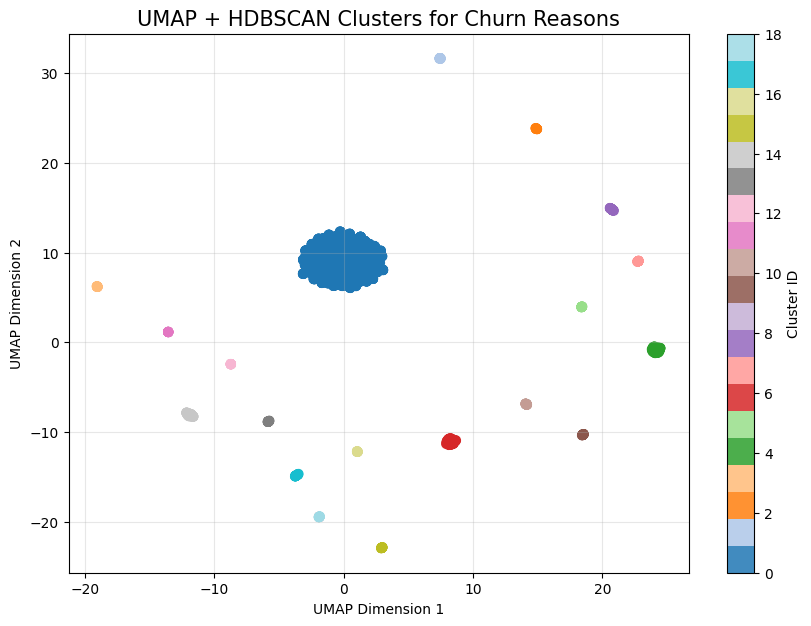

<Figure size 640x480 with 0 Axes>

In [26]:
# UMAP for Dimensionality Reduction
import umap
umap_reducer = umap.UMAP(
    n_components=2, 
    random_state=42,
    n_neighbors=15,
    min_dist=0.1,
    metric='cosine'
    )
embeddings_2d = umap_reducer.fit_transform(embeddings)

# HDBSCAN for Clustering
import hdbscan
hdbscan_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,
    metric='euclidean',
    cluster_selection_method='eom'
)

predicted_clusters = pd.Series(hdbscan_clusterer.fit_predict(embeddings_2d), name="Churn Reason Cluster")
print(predicted_clusters.value_counts())

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=predicted_clusters,
    cmap='tab20',
    s=40,
    alpha=0.85
)

plt.colorbar(scatter, label="Cluster ID")
plt.title("UMAP + HDBSCAN Clusters for Churn Reasons", fontsize=15)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(alpha=0.3)
plt.show()

plt.savefig("./figs/churn_reason_clusters.png", dpi=300)

In [27]:
churn_reason_encoder = LabelEncoder()
train_data_churn_reason["Churn Reason ID"] = churn_reason_encoder.fit_transform(train_data_churn_reason["Churn Reason"])
print(churn_reason_encoder.classes_)
print(train_data_churn_reason["Churn Reason ID"].value_counts())

['Attitude of service provider' 'Attitude of support person'
 'Competitor had better devices' 'Competitor made better offer'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Deceased' 'Did not churn' "Don't know"
 'Extra data charges' 'Lack of affordable download/upload speed'
 'Lack of self-service on Website' 'Limited range of services'
 'Long distance charges' 'Moved' 'Network reliability'
 'Poor expertise of online support' 'Poor expertise of phone support'
 'Price too high' 'Product dissatisfaction' 'Service dissatisfaction']
Churn Reason ID
7     3104
2      188
3      187
1      136
8       87
0       64
5       57
4       54
15      46
18      44
19      42
13      39
14      32
20      32
9       27
12      25
10      20
11      17
16      14
6        6
17       4
Name: count, dtype: int64


In [28]:
train_data_churn_reason.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Customer Status,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Unlimited Data,Churn,Stickiness Score,Churn Reason ID
0,72,4,19.44,3,Did not churn,51,San Mateo,4849,Two Year,Stayed,...,25,2191.15,0,486.00,0.0,2677.15,1,0,4,7
1,27,59,45.62,3,Did not churn,27,Sutter Creek,3715,Month-to-Month,Stayed,...,35,3418.20,0,1596.70,0.0,5014.90,1,0,3,7
2,59,0,16.07,3,Did not churn,59,Santa Cruz,5092,Month-to-Month,Stayed,...,46,851.20,0,739.22,0.0,1590.42,0,0,0,7
3,25,27,0.00,3,Did not churn,49,Brea,2068,One Year,Stayed,...,27,1246.40,30,0.00,0.0,1276.40,0,0,4,7
4,31,21,17.22,2,Network reliability,88,San Jose,4026,One Year,Churned,...,58,3563.80,0,998.76,0.0,4562.56,1,1,3,15


In [29]:
train_data_churn_reason.drop(["Churn Reason"], axis=1, inplace=True)

In [30]:
train_data_churn_reason.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Score,City,CLTV,Contract,Customer Status,Dependents,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Unlimited Data,Churn,Stickiness Score,Churn Reason ID
0,72,4,19.44,3,51,San Mateo,4849,Two Year,Stayed,0,...,25,2191.15,0,486.00,0.0,2677.15,1,0,4,7
1,27,59,45.62,3,27,Sutter Creek,3715,Month-to-Month,Stayed,0,...,35,3418.20,0,1596.70,0.0,5014.90,1,0,3,7
2,59,0,16.07,3,59,Santa Cruz,5092,Month-to-Month,Stayed,0,...,46,851.20,0,739.22,0.0,1590.42,0,0,0,7
3,25,27,0.00,3,49,Brea,2068,One Year,Stayed,0,...,27,1246.40,30,0.00,0.0,1276.40,0,0,4,7
4,31,21,17.22,2,88,San Jose,4026,One Year,Churned,0,...,58,3563.80,0,998.76,0.0,4562.56,1,1,3,15


In [31]:
train_data_churn_reason.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   int64  
 4   Churn Score                        4225 non-null   int64  
 5   City                               4225 non-null   object 
 6   CLTV                               4225 non-null   int64  
 7   Contract                           4225 non-null   object 
 8   Customer Status                    4225 non-null   object 
 9   Dependents                         4225 non-null   int64  
 10  Gender                             4225 non-null   object 
 11  Internet Service                   4225 non-null   int64  
 1

In [32]:
train_data_city = train_data_churn_reason.copy(deep=True)

In [33]:
train_data_city["City"].nunique()

1085

In [34]:
city_encoder = LabelEncoder()
train_data_city["City"] = city_encoder.fit_transform(train_data_city["City"])
train_data_city["City"].head()

0    853
1    955
2    867
3    109
4    843
Name: City, dtype: int64

In [35]:
train_data_gender = train_data_city.copy(deep=True)

In [36]:
gender_encoder = LabelEncoder()
train_data_gender["Gender"] = gender_encoder.fit_transform(train_data_gender["Gender"])
train_data_gender["Gender"].head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [37]:
train_data_contract = train_data_gender.copy(deep=True)

In [38]:
contract_encoder = LabelEncoder()
train_data_contract["Contract"] = contract_encoder.fit_transform(train_data_contract["Contract"])
train_data_contract["Contract"].head()

0    2
1    0
2    0
3    1
4    1
Name: Contract, dtype: int64

In [39]:
train_data_customer_status = train_data_contract.copy(deep=True)

In [40]:
customer_status_encoder = LabelEncoder()
train_data_customer_status["Customer Status"] = customer_status_encoder.fit_transform(train_data_customer_status["Customer Status"])
train_data_customer_status["Customer Status"].head()

0    2
1    2
2    2
3    2
4    0
Name: Customer Status, dtype: int64

In [41]:
train_data_internet_type = train_data_customer_status.copy(deep=True)

In [42]:
internet_type_encoder = LabelEncoder()
train_data_internet_type["Internet Type"] = internet_type_encoder.fit_transform(train_data_internet_type["Internet Type"])
train_data_internet_type["Internet Type"].head()

0    2
1    2
2    3
3    1
4    0
Name: Internet Type, dtype: int64

In [43]:
train_data_internet_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   int64  
 4   Churn Score                        4225 non-null   int64  
 5   City                               4225 non-null   int64  
 6   CLTV                               4225 non-null   int64  
 7   Contract                           4225 non-null   int64  
 8   Customer Status                    4225 non-null   int64  
 9   Dependents                         4225 non-null   int64  
 10  Gender                             4225 non-null   int64  
 11  Internet Service                   4225 non-null   int64  
 1

In [44]:
train_data_payment_method = train_data_internet_type.copy(deep=True)

In [45]:
train_data_payment_method["Payment Method"].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

In [46]:
payment_method_encoder = LabelEncoder()
train_data_payment_method["Payment Method"] = payment_method_encoder.fit_transform(train_data_payment_method["Payment Method"])
train_data_payment_method["Payment Method"].head()

0    0
1    0
2    0
3    1
4    1
Name: Payment Method, dtype: int64

In [47]:
train_data_offer = train_data_payment_method.copy(deep=True)

In [48]:
train_data_offer["Offer"].unique()

array([nan, 'Offer B', 'Offer E', 'Offer A', 'Offer D', 'Offer C'],
      dtype=object)

In [1]:
train_data_offer["Offer"].fillna("None",inplace=True)

NameError: name 'train_data_offer' is not defined

In [50]:
offer_encoder = LabelEncoder()
train_data_offer["Offer"] = offer_encoder.fit_transform(train_data_offer["Offer"])
train_data_offer["Offer"].head()

0    0
1    0
2    0
3    0
4    2
Name: Offer, dtype: int64

In [51]:
train_data_offer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   int64  
 4   Churn Score                        4225 non-null   int64  
 5   City                               4225 non-null   int64  
 6   CLTV                               4225 non-null   int64  
 7   Contract                           4225 non-null   int64  
 8   Customer Status                    4225 non-null   int64  
 9   Dependents                         4225 non-null   int64  
 10  Gender                             4225 non-null   int64  
 11  Internet Service                   4225 non-null   int64  
 1

In [52]:
train_data_offer.drop(["Customer Status"], axis=1, inplace=True)
train_data_offer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   int64  
 4   Churn Score                        4225 non-null   int64  
 5   City                               4225 non-null   int64  
 6   CLTV                               4225 non-null   int64  
 7   Contract                           4225 non-null   int64  
 8   Dependents                         4225 non-null   int64  
 9   Gender                             4225 non-null   int64  
 10  Internet Service                   4225 non-null   int64  
 11  Internet Type                      4225 non-null   int64  
 1

In [53]:
final_train_data = train_data_offer.copy(deep=True)

In [54]:
# Separate the boolean feature columns
[final_train_data.nunique() == 2]

[Age                                  False
 Avg Monthly GB Download              False
 Avg Monthly Long Distance Charges    False
 Churn Category                       False
 Churn Score                          False
 City                                 False
 CLTV                                 False
 Contract                             False
 Dependents                            True
 Gender                                True
 Internet Service                      True
 Internet Type                        False
 Married                               True
 Monthly Charge                       False
 Multiple Lines                        True
 Number of Dependents                 False
 Number of Referrals                  False
 Offer                                False
 Paperless Billing                     True
 Partner                               True
 Payment Method                       False
 Phone Service                         True
 Referred a Friend              

In [55]:
boolean_columns = final_train_data.columns[final_train_data.nunique() == 2].tolist()
scaling_df = final_train_data.drop(columns=boolean_columns, axis=1)
scaling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     4225 non-null   int64  
 4   Churn Score                        4225 non-null   int64  
 5   City                               4225 non-null   int64  
 6   CLTV                               4225 non-null   int64  
 7   Contract                           4225 non-null   int64  
 8   Internet Type                      4225 non-null   int64  
 9   Monthly Charge                     4225 non-null   float64
 10  Number of Dependents               4225 non-null   int64  
 11  Number of Referrals                4225 non-null   int64  
 1

In [56]:
scaler = StandardScaler()
scaling_df_scaled = scaler.fit_transform(scaling_df)

In [57]:
final_train_data_merged = pd.concat(
    [
        pd.DataFrame(scaling_df_scaled, columns=scaling_df.columns),
        final_train_data[boolean_columns].reset_index(drop=True)
    ],
    axis=1
)
final_train_data_merged.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Score,City,CLTV,Contract,Internet Type,Monthly Charge,...,Gender,Internet Service,Married,Multiple Lines,Paperless Billing,Partner,Phone Service,Referred a Friend,Unlimited Data,Churn
0,1.527172,-0.822092,-0.215642,0.322618,-0.343526,0.920994,0.375279,1.473029,0.288641,0.785147,...,0,1,1,0,0,1,1,1,1,0
1,-1.162682,1.878793,1.481254,0.322618,-1.475846,1.261375,-0.593571,-0.879919,0.288641,1.022427,...,1,1,0,1,0,0,1,0,1,0
2,0.750103,-1.018520,-0.434074,0.322618,0.033914,0.967713,0.582889,-0.879919,1.371687,-1.514128,...,1,0,1,0,0,1,1,1,0,0
3,-1.282231,0.307369,-1.475675,0.322618,-0.437886,-1.561783,-2.000709,0.296555,-0.794405,-0.636861,...,1,1,1,0,1,1,0,1,0,0
4,-0.923583,0.012727,-0.359535,-0.687806,1.402134,0.887623,-0.327863,0.296555,-1.877450,-0.153947,...,1,1,1,0,0,1,1,1,1,1


In [58]:
X_train = final_train_data_merged.drop(["Churn"], axis=1)
Y_train = final_train_data_merged["Churn"]

In [59]:
from sklearn.tree import DecisionTreeClassifier
